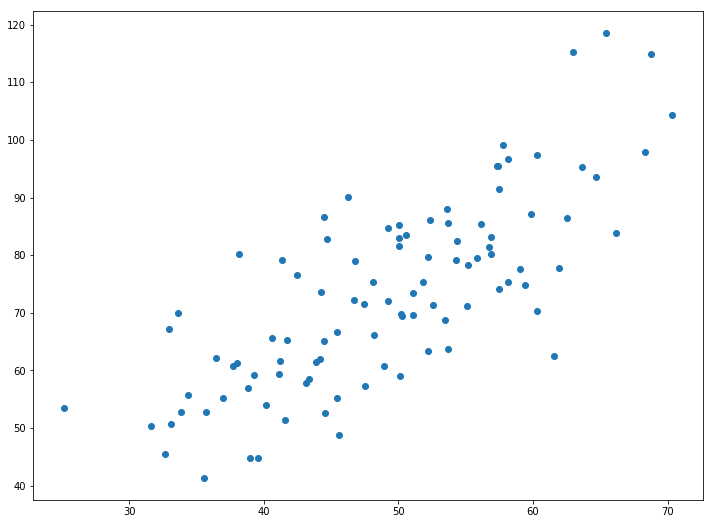

In [2]:
# Making the imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('../01.Linear_Regression_with_Gradient_Descent/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [29]:
print(Y[:5])
print(X[:5])

0    68.777596
1    62.562382
2    71.546632
3    87.230925
4    78.211518
Name: 31.70700584656992, dtype: float64
0    53.426804
1    61.530358
2    47.475640
3    59.813208
4    55.142188
Name: 32.502345269453031, dtype: float64


In [3]:
# Getting input size
print(X.shape)
n = X.shape[0]
n

(99,)


99

In [31]:
# Random Initialization
# We use `m` but think it like, `theta`, `beta`, `a` etc.
# See different notations above
# https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d
# https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf
# https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-5-974/
m = np.random.rand(n)
c = np.zeros(n)
print(m[:10])
print(c[:10])

[0.86168061 0.23220349 0.74193602 0.09861866 0.27122672 0.10636078
 0.10399507 0.33621526 0.32128654 0.42216541]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [76]:
%%time
# Calculating partial derivatives with respect to m and c from cost function
# Doing Gradient Descent
#m = np.ones(n)
#m = np.zeros(n)
m = np.random.rand(n)
c = np.zeros(n)
L = 0.0001  # The learning Rate

epochs = 1000  # The number of iterations to perform gradient descent

for k in range(epochs):
    D_m = 0
    D_c = 0
    D_m_sum = 0
    D_c_sum = 0
    for i in range(n):
        y_i = m[i]*X[i] + c[i]
        D_m += X[i]*(Y[i] - y_i)
        D_c += Y[i] - y_i
    D_m_sum = (-2/n)*D_m
    D_c_sum = (-2/n)*D_c
    for i in range(n):   
        m[i] = m[i] - L*D_m_sum
        c[i] = c[i] - L*D_c_sum

print(m[:10])
print(c[:10])

[1.61017962 1.29583242 1.23009088 1.9329996  1.79869257 1.30436343
 1.60616706 1.12128679 1.89769142 1.79021753]
[0.21303117 0.21303117 0.21303117 0.21303117 0.21303117 0.21303117
 0.21303117 0.21303117 0.21303117 0.21303117]
CPU times: user 3.23 s, sys: 0 ns, total: 3.23 s
Wall time: 3.23 s


In [77]:
%%time
# hypothesis for all the samples For Loop
Y_pred = []

m_norm = sum(m)/n
c_norm = sum(c)/n

for i in range(n):
    y_i = m_norm*X[i] + c_norm
    Y_pred.append(y_i)

print(Y[:10])
print(Y_pred[:10])

0    68.777596
1    62.562382
2    71.546632
3    87.230925
4    78.211518
5    79.641973
6    59.171489
7    75.331242
8    71.300880
9    55.165677
Name: 31.70700584656992, dtype: float64
[77.89068129874472, 89.67250211305485, 69.23823662501383, 87.175924010436, 80.38469212655643, 76.12417257998429, 57.35097994231167, 70.1533292204987, 76.61591002464125, 66.24913366571457]
CPU times: user 3.01 ms, sys: 0 ns, total: 3.01 ms
Wall time: 2.95 ms


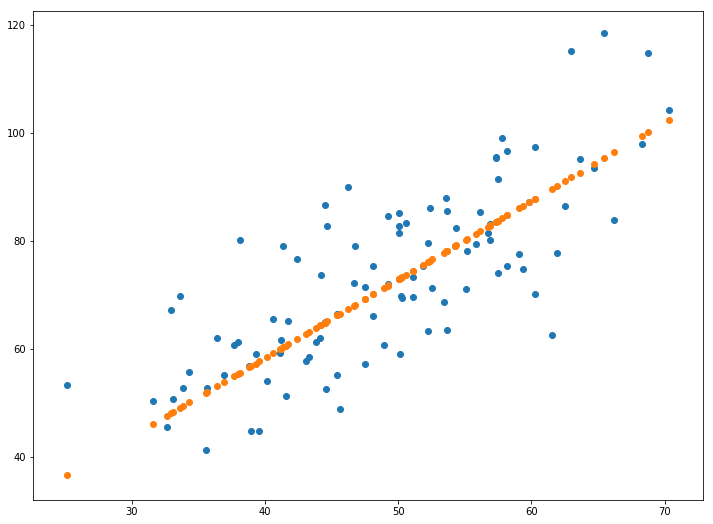

In [81]:
plt.scatter(X, Y)
plt.scatter(X, Y_pred)
plt.show()